Step 0

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
transform = transforms.ToTensor()
batch_size = 500
num_epoch = 50
lr = .0001
hidden_size1 = 300
hidden_size2 = 300
hidden_size3 = 300
hidden_size4 = 300

In [4]:
train_dataset = torchvision.datasets.CIFAR10('/home/arjun/Documents/DatasetCollection', train=True,transform=transform)
test_dataset =  torchvision.datasets.CIFAR10('/home/arjun/Documents/DatasetCollection', train=False,transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=batch_size)

In [5]:
tot_steps = len(train_loader)  # Or the total number of batches

# One step is one batch calculation
tot_steps

100

In [6]:
classes = ['plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
for batch in train_loader:
    image, label = batch

(batch[0]).shape


torch.Size([500, 3, 32, 32])

In [8]:
# print(classes[label[0]])
# plt.imshow(image[0][0])
# plt.show()

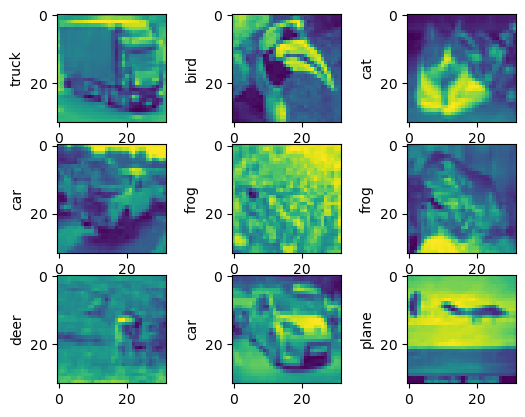

In [9]:
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image[i][0])
    plt.ylabel(classes[label[i]])

Step 1

In [10]:
class CIFAR10_NN(nn.Module):
    def __init__(self, inp_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, out_size):
        super(CIFAR10_NN, self).__init__()
        self.lay1 = nn.Linear(inp_size, hidden_size1)
        self.lay2 = nn.ReLU()
        self.lay3 = nn.Linear(hidden_size1, hidden_size2)
        self.lay4 = nn.Linear(hidden_size2, hidden_size3)
        self.lay5 = nn.Linear(hidden_size3, hidden_size4)
        self.lay6 = nn.Linear(hidden_size4, out_size)
    def forward(self, X):
        out = self.lay1(X)  
        out = self.lay2(out)
        out = self.lay3(out)
        out = self.lay2(out)
        out = self.lay4(out)
        out = self.lay2(out)
        out = self.lay5(out)
        out = self.lay2(out)
        out = self.lay6(out)
        return out
    
model = CIFAR10_NN(32*32, hidden_size1, hidden_size2, hidden_size3, hidden_size4, 10).to(device)

Step 2

In [11]:
lossCat = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=lr)

Step 3

In [12]:
num_steps_in_a_batch = len(train_dataset)/batch_size
for epoch in range(num_epoch):
    for step, (images, labels) in enumerate(train_loader):
        images = images[:,1,:,:].reshape(batch_size,32*32).to(device)
        labels = labels.to(device)

        y_hat = model(images)
        loss = lossCat(y_hat, labels)
        loss.backward()
        optimiser.step()
        optimiser.zero_grad()

        if step == num_steps_in_a_batch - 1:
            print(f"Epoch {epoch+1}  Loss:{loss}")

Epoch 1  Loss:2.143622875213623
Epoch 2  Loss:2.0523977279663086
Epoch 3  Loss:1.99625563621521
Epoch 4  Loss:1.9478918313980103
Epoch 5  Loss:1.8833985328674316
Epoch 6  Loss:1.8452719449996948


KeyboardInterrupt: 

Step 4

In [15]:
# print(len(train_loader))
with torch.no_grad():
    tot_sample, correct_sample = 0,0
    for sample, target in test_loader:  
            sample = sample[:,1,:,:].resize(batch_size, 32*32).to(device)
            target = target.to(device)

            out = model(sample)
            _, prediction = torch.max(out,1)
            # print(target)
            # print(prediction)
            # print()
            
            tot_sample += batch_size
            correct_sample += ((prediction == target).sum()).item()

In [16]:
print(f"Accuracy = {(correct_sample/tot_sample)*100:.3f}")

Accuracy = 32.300


Best Accuracy = 44.5 %